# Assignment 11 - Open University - Image Processing
Student- Dolev Goaz, 322263369
<br>
Date of Submission- 15.11.2024

## Question 1 - Light Source Colinearity

The answer is stored [here](./documents/q1.pdf)- a pdf file.

## Question 2 - Background Without Holes

We will find the background of the image, excluding any holes.
<br>
The key premise of this algorithm is to notice that when inverting the image of a connected component(henceforth referred to as CC), if there's less than 2 CCs present it means that the original CC had no holes.
<br>
We mark the output image as ```output_image```. The background is marked in black (henceforth- 0)
1. Initialize ```output_image``` as an 8-bit image(values of 0-255) with width and height identical to the provided image.
2. We find all the connected components as those with pixel value of white (henceforth- 255).
3. We loop over each component by setting every other component in the image to black.
    1. Negate the image.
    2. Count CCs in the negated image as those with pixel values of white.
        * If there's less than two CCs-
        <br>
        The CC is a part of the background, as it means the original CC had no holes(else we'd find more than one CC). We mark it as background in ```output_image``` by setting it to white.
        * If there's more than one CC-
        <br>
        Any CC that has a boundary that's not a neighbor of the original CC is a part of the background, as it isn't completely surrounded by the initial CC.
        <br>
        We mark it as background in ```output_image``` by setting it to white.
4. Return the resulting ```output_image```
            

## Question 3 - HSV Decomposing
While the question specified HSI, the professor allowed using HSV instead.

In [ ]:
# ================= This is done because all code files are stored inside 'code', harms intellisense though :(
#                   This is because we can't import a package from within jupyter(at least, I couldn't make it work)
import sys
sys.path.append("./code")
# =================

import cv_utils
import cv2

OUTPUT_PATH = "output_images/q3"

img = cv2.imread("input_images/Lenna.png", cv2.IMREAD_COLOR)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_h, img_s, img_v = cv2.split(img_hsv)

mapping = {
    "Original": img,
    "Hue": img_h,
    "Saturation": img_s,
    "Value": img_v
}

cv_utils.display_images_notebook(titles=mapping.keys(), images=mapping.values())

for name, image in mapping.items():
    if name == 'Original':
        continue
    output_file = f"{OUTPUT_PATH}/{name}.png"
    cv_utils.save_image(image, output_file)
    print(f"Output image saved in {output_file}")


## Question 4 - Colored Error Diffusion

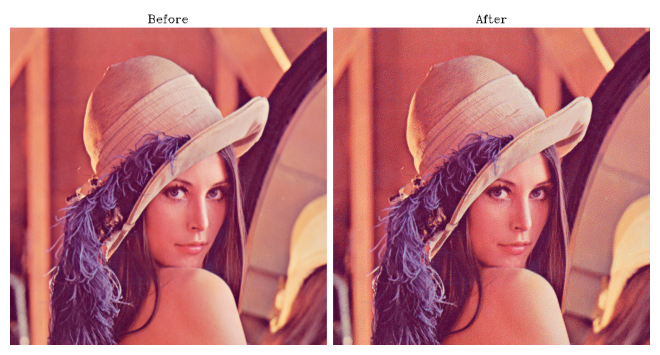

Output image saved in output_images/q4/Diffused.png


In [ ]:
# ================= This is done because all code files are stored inside 'code', harms intellisense though :(
#                   This is because we can't import a package from within jupyter(at least, I couldn't make it work)
import sys
sys.path.append("./code")
# =================

import cv_utils
from colored_error_diffusion import colored_error_diffusion, generate_colors_bgr
import cv2

OUTPUT_PATH = "output_images/q4"

img = cv2.imread("input_images/Lenna.png", cv2.IMREAD_COLOR)

# can pass random=False to have red, green, blue, black and white
colors = generate_colors_bgr(amount=1<<3) # 3 bits, 8 colors
color_diffused_img = colored_error_diffusion(img, colors)

cv_utils.display_images_notebook(titles=["Before", "After"], images=[img, color_diffused_img])

output_file = f"{OUTPUT_PATH}/Diffused.png"
cv_utils.save_image(color_diffused_img, output_file)
print(f"Output image saved in {output_file}")

cv2.waitKey(0)
cv2.destroyAllWindows()

Example result using the colors black, white, red, green and blue-
<br>
![blabla](example_images/question_4.png)